# Build your own CNN
- Recap

- Data prep

- Building a first CNN
    - Demo
    - Your turn

- Dropout
    - Demo
    - Your turn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
np.random.seed(42) # for reproducibility
import tensorflow as tf
tf.random.set_seed(42)

In [29]:
import tensorflow as tf
import random as rn

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.random.set_seed(42)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

### Data ingestion and formatting

In [4]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2,random_state=42)

In [5]:
X_train.shape

(48000, 28, 28)

### reshape data to fit model

In [6]:
# the models expects information about the channels used
# reshape data to fit model
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [7]:
X_train.shape

(48000, 28, 28, 1)

### EDA

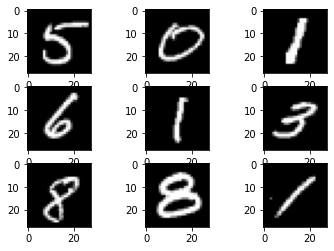

In [8]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
y_train[:10]

array([5, 0, 1, 6, 1, 3, 8, 8, 1, 8], dtype=uint8)

### one-hot encode target column

In [10]:
from keras.utils import to_categorical

# one-hot encode target column
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [11]:
y_train.shape

(48000, 10)

In [12]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [13]:
for i in range(0, 9):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# CNNs best practices

## Convolutional layers
Use small kernels/filters:
 - 3x3 or 5x5<br>
 
Use small strides:
 
 - 1 or 2 respectively for the above kernels
 - In general: Strides = (Kernel size -1)/2
 
 #### Discuss:
 How does the shape of our data change after applying a 3x3 convolutional layer with stride 1?
 
 
## Pooling layers
Downsampling of Convolutional output<br>

Use small kernels/filters:
 - 2x2
 - Sometimes you may want to use 3x3 but larger tends to reduce performance heavily<br>
 
Use small strides:
 
 - 2
 - Very rarely 3
 
 #### Discuss:
 By how much do we reduce our data size when we perform a 2x2 pooling of stride 2?


## Flattening layers
- Transform multidimensional data into in the NN into an array that can be used by a Dense Layer
- The nexus between your non-fully-connected and fully-connected layers

# Demo

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout

In [33]:
# Intitialise your NN
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),strides=1,input_shape=(28,28,1),activation='relu'))
# Add a pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2))
# Add a flattening layer
model.add(Flatten())
# Add a dense layer suitable for our problem
model.add(Dense(10,activation='softmax'))
# Compile your CNN
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
# Show summary and compare with your partner
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Fit / Validate your model (Keep Epochs to 5 for our example)
history = model.fit(X_train,y_train,batch_size=1000,epochs=1,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 10s 208us/step - loss: 6.7179 - accuracy: 0.7768 - val_loss: 1.5414 - val_accuracy: 0.9101


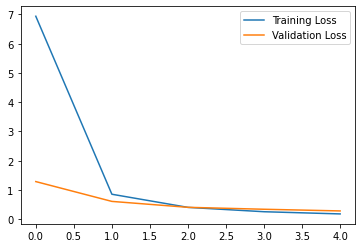

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

In [35]:
# Intitialise your NN
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),strides=1,input_shape=(28,28,1),activation='relu'))
# Add a pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2))
# Add a flattening layer
model.add(Flatten())
# Add a dense layer suitable for our problem
model.add(Dense(10,activation='softmax'))
# Compile your CNN
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
# Show summary and compare with your partner
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Fit / Validate your model (Keep Epochs to 5 for our example)
history = model.fit(X_train,y_train,batch_size=1000,epochs=1,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 10s 209us/step - loss: 5.5920 - accuracy: 0.7903 - val_loss: 1.2309 - val_accuracy: 0.9213


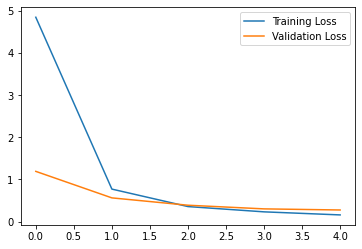

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Wait what?!!

# [But mum... Why is the training loss higher than the validation loss???!!!](https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss)

# Looking at outputs

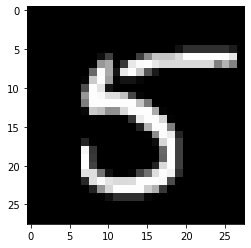

In [20]:
plt.imshow(X_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))

In [21]:
model.predict(X_train[:1])

array([[1.0249360e-33, 9.2524447e-38, 1.8268228e-28, 3.6567906e-21,
        2.9597476e-34, 1.0000000e+00, 2.1086213e-27, 1.4877877e-36,
        6.3164492e-18, 3.6731480e-21]], dtype=float32)

In [26]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_2').output)
intermediate_output = intermediate_layer_model.predict(X_train)

In [27]:
intermediate_output[0].shape

(13, 13, 32)

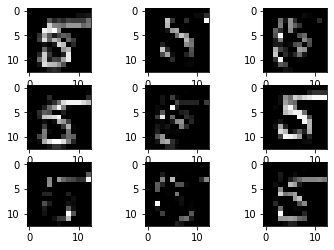

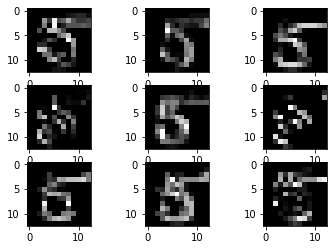

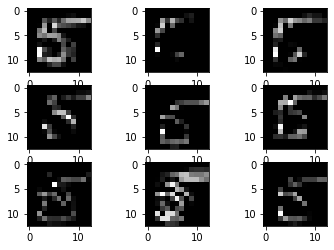

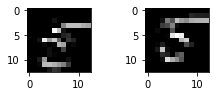

In [28]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(10,19):
    plt.subplot(330 + 1 + i-10)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(20,29):
    plt.subplot(330 + 1 + i-20)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()
for i in range(30,32):
    plt.subplot(330 + 1 + i-30)
    plt.imshow(intermediate_output[0].T[i].T, cmap=plt.get_cmap('gray'))
plt.show()

## 1 Convolutional layer + 1 Pooling layer

In [29]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3,strides=1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 17s 346us/step - loss: 6.4801 - accuracy: 0.7950 - val_loss: 1.1120 - val_accuracy: 0.9300
Epoch 2/5
48000/48000 [==============================] - 16s 324us/step - loss: 0.6445 - accuracy: 0.9484 - val_loss: 0.4394 - val_accuracy: 0.9571
Epoch 3/5
48000/48000 [==============================] - 16s 338us/step - loss: 0.2566 - accuracy: 0.9677 - val_loss: 0.2523 - val_accuracy: 0.9659
Epoch 4/5
48000/48000 [==============================] - 16s 329us/step - loss: 0.1358 - accuracy: 0.9766 - val_loss: 0.2161 - val_accuracy: 0.9678
Epoch 5/5
48000/48000 [==============================] - 16s 329us/step - loss: 0.0915 - accuracy: 0.9823 - val_loss: 0.1785 - val_accuracy: 0.9720


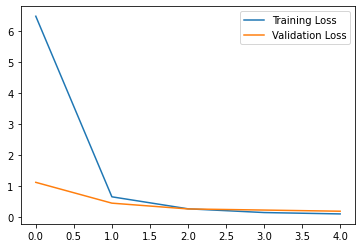

In [31]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

# Now build your CNN

#### Person A:
Output layer one 64 neurons, kernel 3x3<br>
Layer two kernel 2x2
#### Person B:
Output layer one 64 neurons, kernel 5x5<br>
Layer two kernel 2x2

In [32]:
# Intitialise your NN
# Add a convolutional layer
# Add a pooling layer
# Add a flattening layer
# Add a dense layer suitable for our problem
# Compile your CNN
# Show summary and compare with your partner

In [33]:
# Fit / Validate your model (Keep Epochs to 5 for our example)

## 2 Convolutional layer + 2 Pooling layer

In [34]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
__________________________________________________

In [35]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 24s 490us/step - loss: 3.9896 - accuracy: 0.6285 - val_loss: 0.5694 - val_accuracy: 0.8483
Epoch 2/5
48000/48000 [==============================] - 23s 486us/step - loss: 0.3977 - accuracy: 0.8915 - val_loss: 0.2754 - val_accuracy: 0.9232
Epoch 3/5
48000/48000 [==============================] - 23s 482us/step - loss: 0.2224 - accuracy: 0.9375 - val_loss: 0.1958 - val_accuracy: 0.9462
Epoch 4/5
48000/48000 [==============================] - 23s 472us/step - loss: 0.1579 - accuracy: 0.9537 - val_loss: 0.1538 - val_accuracy: 0.9561
Epoch 5/5
48000/48000 [==============================] - 23s 483us/step - loss: 0.1246 - accuracy: 0.9631 - val_loss: 0.1283 - val_accuracy: 0.9629


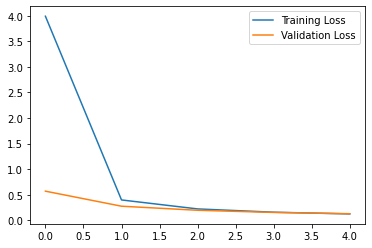

In [36]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 2 Convolutional layers

In [37]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 50s 1ms/step - loss: 1.6378 - accuracy: 0.8175 - val_loss: 0.1624 - val_accuracy: 0.9538
Epoch 2/5
48000/48000 [==============================] - 48s 1ms/step - loss: 0.1067 - accuracy: 0.9683 - val_loss: 0.0955 - val_accuracy: 0.9708
Epoch 3/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0812 - val_accuracy: 0.9747
Epoch 4/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0371 - accuracy: 0.9893 - val_loss: 0.0747 - val_accuracy: 0.9778
Epoch 5/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0244 - accuracy: 0.9935 - val_loss: 0.0828 - val_accuracy: 0.9774


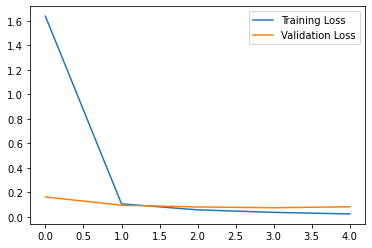

In [39]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## 7 Convolutional layers

### Deeper networks tend to generalise better

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()

## Dropout layers
Use small dropout values:
 - 20-50%<br>
 
Can be used on the visible and hidden layers
 
 #### Discuss:
 How does the shape of our data change after applying a dropout layer?

In [ ]:
#create model
model = Sequential()

#add model layers
model.add(Dropout(0.2, input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=5, verbose=1, batch_size=1000)

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()